<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/ProyectoMLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Primer Proyecto de MLPs**

- El objetivo de este ejercicio es revisar todos los conceptos vistos en clase hasta ahora, para construir una arquitectura de red neuronal completamente conectada (MLP), que tenga el mejor desempeño posible sobre una tarea dada.

- La idea es que a través de la experimentación, lleguemos a construir un modelo robusto, que sirva como base para resolver otras tareas similares.

- El problema a resolver es de clasificación de imágenes usando CIFAR10.

##**Conjunto de Datos**

El conjunto de datos CIFAR10 tiene imágenes de 32x32 píxeles. Hay 50.000 imágenes de entrenamiento y 10.000 imágenes de pruebas. Cada imagen en CIFAR10 tiene asignada una de las diez clases disponibles.


In [215]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [216]:
from sklearn.model_selection import train_test_split

##**Etapas mínimas a realizar**

Las etapas se encuentran enumeradas














1. Separar los conjuntos de entrenamiento, validación y prueba correspondientes.

In [217]:
(X_train_full, y_train_full), (X_test, y_test)=tf.keras.datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# conservamos la separacion entre entrenamiento X_train_full (50000) y prueba X_test (10000)
#separamos aleatoriamente X_train (37500) y X_valid (12500)

In [218]:
assert X_train_full.shape == (50000, 32, 32, 3)
assert y_train_full.shape == (50000, 1)
assert y_test.shape == (10000, 1)

assert X_train.shape == (37500, 32, 32, 3)
assert X_valid.shape == (12500, 32, 32, 3)

In [219]:
clases_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

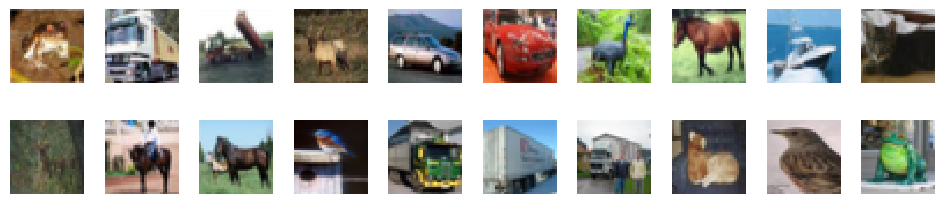

In [220]:
n_rows = 2
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):#
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)

        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        #plt.title(clases_names[y_train_full[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

2. Aplicar escala y normalización, si lo cree conveniente.

In [221]:
#Reducimos las intensidades de los píxeles al rango 0-1 dividiéndolas por 255.
#con ello normalizamos los datos y evitamos inestabilidad numérica
X_train=X_train/255
X_valid=X_valid/255
X_test=X_test/255

3. Usar el enfoque funcional (functional API) para definir la arquitectura de la red neuronal MLP.

In [230]:
np.random.seed(42)
tf.random.set_seed(42)

In [233]:
input_ = keras.layers.Input(shape=(32,32,3))

hidden1 = keras.layers.Dense(50, activation="relu")(input_)
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(50, activation="relu")(hidden3)
hidden5 = keras.layers.Dense(50, activation="relu")(hidden4)

concat = keras.layers.concatenate([input_, hidden5])

output = keras.layers.Dense(10,activation="softmax")(concat)

model1 = keras.models.Model(inputs=[input_], outputs=[output])

In [234]:
model1.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 dense_42 (Dense)            (None, 32, 32, 50)           200       ['input_8[0][0]']             
                                                                                                  
 dense_43 (Dense)            (None, 32, 32, 50)           2550      ['dense_42[0][0]']            
                                                                                                  
 dense_44 (Dense)            (None, 32, 32, 50)           2550      ['dense_43[0][0]']            
                                                                                            

In [238]:
input_ = keras.layers.Input(shape=X_train.shape[1:])

hidden1 = keras.layers.Dense(50, activation="relu")(input_)
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(50, activation="relu")(hidden3)
hidden5 = keras.layers.Dense(50, activation="relu")(hidden4)

concat = keras.layers.concatenate([input_, hidden5])

output = keras.layers.Dense(10,activation="softmax")(concat)

model2 = keras.models.Model(inputs=[input_], outputs=[output])


In [239]:
model1.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 dense_42 (Dense)            (None, 32, 32, 50)           200       ['input_8[0][0]']             
                                                                                                  
 dense_43 (Dense)            (None, 32, 32, 50)           2550      ['dense_42[0][0]']            
                                                                                                  
 dense_44 (Dense)            (None, 32, 32, 50)           2550      ['dense_43[0][0]']            
                                                                                            

4. La arquitectura debe ser profunda, con por lo menos 5 capas densas. Definir un número de neuronas para cada capa oculta, función de costo y justificar esas elecciones.

5. Usar Callbacks: ModelCheckpoint y EarlyStopping al momento de entrenar.

6. Mostrar el gráfico de la función de costo en tiempo de entrenamiento vs tiempo de validación, para verificar si hay overfitting.

6. Definir una función de activación y también un mecanismo de inicialización de pesos. Justificar esta elección.

7. Usar el mecanismo de Batch Normalization. Justificar la elección de sus hiperparámetros.

8. Usar un mecanismo de regularización (puede ser Dropout).

9. Definir una función de optimización y justificar su elección.

10. Encontrar una taza de aprendizaje adecuada usando alguna estrategia de *Learning Rate Scheduling*. Justificar la elección de sus hiperparámetros.

11. Realizar un proceso de ajuste de hiperparámetros (los que considere convenientes), usando Keras Tuner.

12. Reporte el resultado final en el conjunto de prueba usando la(s) métrica(s) de clasificación seleccionada(s).

13. Definir una segunda arquitectura reutilizando todas las capas y sus pesos (a excepción de la capa de salida) haciendo una conexión *wide and deep*, de las entradas. Mejora el resultado?

##**Recomendaciones**

- Se pueden intentar otras optimizaciones adicionales, arquitecturas y afinamientos. El objetivo es intentar mejorar cada vez más la métrica del problema en cuestión.

- En la medida de lo posible, justifique las elecciones de arquitectura, hiperparámetros, etc.

- Es posible, que una arquitectura más simple resuelva mejor el problema, indicar esto después de haber probado la configuración básica propuesta.

In [34]:
import numpy as np

# Crear una matriz de ejemplo
matriz_ejemplo = np.random.randint(0, 256, size=(1, 32, 32, 3))

# Mostrar la matriz de ejemplo
print(matriz_ejemplo)

[[[[ 67  60 124]
   [ 52 133  69]
   [ 76  99 191]
   ...
   [ 97 148  70]
   [132  12  42]
   [221 227 122]]

  [[ 18 181  41]
   [ 11 231 189]
   [  4 232 171]
   ...
   [ 57 222 244]
   [137 123 188]
   [239 231 176]]

  [[139 191 174]
   [245 152 138]
   [ 13  34 139]
   ...
   [203 130 232]
   [ 82 208 137]
   [243 252 200]]

  ...

  [[109 231  75]
   [115 195 241]
   [ 40  16  73]
   ...
   [126  60 200]
   [171  67  16]
   [100  71  57]]

  [[108 228 165]
   [239 183  88]
   [135 153  93]
   ...
   [249 181 160]
   [207 228 215]
   [155 169 234]]

  [[244 162 244]
   [167 216 175]
   [214  51  80]
   ...
   [ 48 237  33]
   [ 44 223  22]
   [185 148  33]]]]


In [64]:
len(matriz_ejemplo)

1

In [61]:
len(matriz_ejemplo[0])

32

In [62]:
len(matriz_ejemplo[0][0])

32

In [63]:
len(matriz_ejemplo[0][0][0])

3

In [75]:
print(matriz_ejemplo[0][0])

[[ 67  60 124]
 [ 52 133  69]
 [ 76  99 191]
 [ 54 143 194]
 [ 80 135 170]
 [131 199 204]
 [ 81 153 198]
 [208 251 230]
 [186 103 203]
 [ 37 177 160]
 [ 63 241 133]
 [250 109  92]
 [ 80 141  60]
 [ 99  82 149]
 [ 89  81  54]
 [228 192 237]
 [ 84  41  67]
 [199  24   3]
 [121  62 188]
 [119  83 121]
 [ 56 179 243]
 [140  32  67]
 [ 27   6  39]
 [105 190 237]
 [ 39  62  48]
 [ 77 234 210]
 [ 92 163 117]
 [ 38 236  74]
 [248  39 185]
 [ 97 148  70]
 [132  12  42]
 [221 227 122]]
